In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind


In [2]:
Data=pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
Data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


### 1.1.1 Use methods of descriptive statistics to summarize data.

In [4]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
Data['Total']=Data['Fresh']+Data['Milk']+Data['Grocery']+Data['Frozen']+Data['Detergents_Paper']+Data['Delicatessen']

In [6]:
Data.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


### 1.1.2 Which Region and which Channel seems to spend more?

Region_wise spend


,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total,%_Total
0,Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813,16.326229
1,Oporto,14899,464721,239144,433274,190132,173311,54506,1555088,10.637081
2,Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599,73.036691


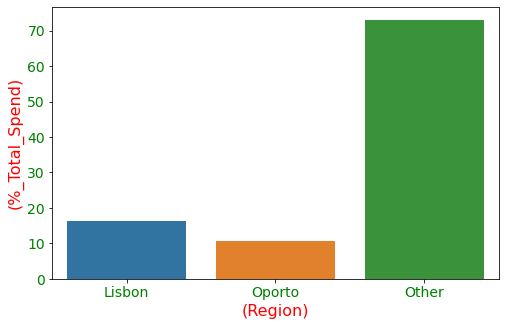

In [7]:
df_reg=Data.groupby(['Region']).sum()
df_reg.reset_index(inplace=True)
print('Region_wise spend')
df_reg['%_Total']=df_reg['Total']/df_reg['Total'].sum()*100
display(df_reg)
print('')

plt.figure(figsize=(8,5))
sns.barplot(y=df_reg['%_Total'],x=df_reg['Region'],estimator=sum)
plt.xticks(fontsize=14,color='green')
plt.yticks(fontsize=14,color='green')
plt.ylabel('(%_Total_Spend)',fontsize=16,color='red')
plt.xlabel('(Region)',fontsize=16,color='red')
plt.show()


Channel_wise spend


,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total,%_Total
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569,54.718486
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931,45.281514


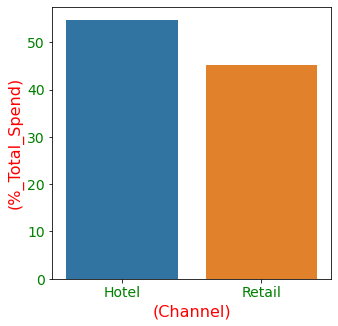

In [8]:
df_ch=Data.groupby(['Channel']).sum()
df_ch.reset_index(inplace=True)
print('Channel_wise spend')
df_ch['%_Total']=df_ch['Total']/df_ch['Total'].sum()*100
display(df_ch)
print('')

plt.figure(figsize=(5,5))
sns.barplot(y=df_ch['%_Total'],x=df_ch['Channel'],estimator=sum)
plt.xticks(fontsize=14,color='green')
plt.yticks(fontsize=14,color='green')
plt.ylabel('(%_Total_Spend)',fontsize=16,color='red')
plt.xlabel('(Channel)',fontsize=16,color='red')
plt.show()

## Conclusion
> Other region and Hotel channel have more spendings and oporto region and retail channel have less spendings on them

## 1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [9]:
df_ch2=Data[['Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].groupby('Channel')

In [10]:
df_ch2.describe().T

Channel                         Hotel        Retail
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

In [11]:
df_reg2=Data[['Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].groupby('Region')
df_reg2.describe().T

Region                        Lisbon        Oporto          Other
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

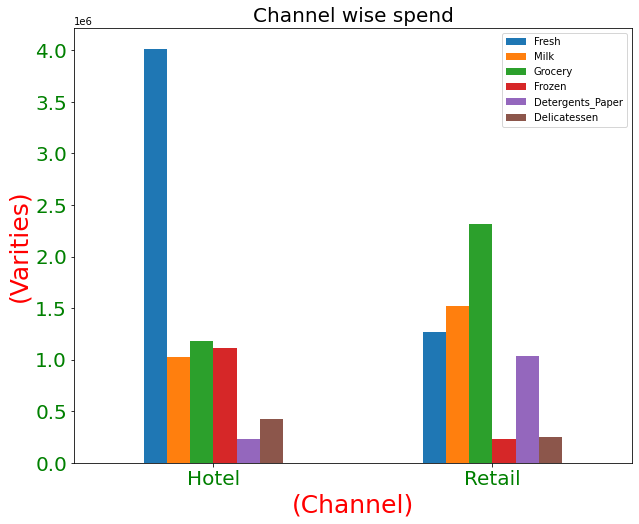

In [12]:
axis=df_ch[['Fresh', 'Milk', 'Grocery', 'Frozen',
          'Detergents_Paper', 'Delicatessen']].plot(kind='bar',stacked=False,figsize=(10,8),rot=0)
plt.xlabel('(Channel)',fontsize=25,color='red')
plt.ylabel('(Varities)',fontsize=25,color='red')
plt.xticks(fontsize=20,color='green')
plt.yticks(fontsize=20,color='green')
axis.set_xticklabels(df_ch['Channel'])
plt.title('Channel wise spend',fontsize=20)

plt.show()

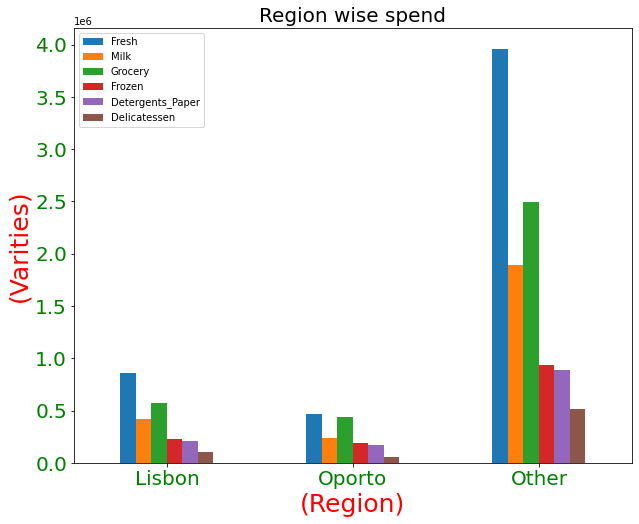

In [13]:
axis=df_reg[['Fresh', 'Milk', 'Grocery', 'Frozen',
          'Detergents_Paper', 'Delicatessen']].plot(kind='bar',stacked=False,figsize=(10,8),rot=0)
plt.xlabel('(Region)',fontsize=25,color='red')
plt.ylabel('(Varities)',fontsize=25,color='red')
plt.xticks(fontsize=20,color='green')
plt.yticks(fontsize=20,color='green')
axis.set_xticklabels(df_reg['Region'])
plt.title('Region wise spend',fontsize=20)
plt.show()

### In channel all the varieties show different behavior and in Region wise split varieties show same behavior though central tendecies changes and varies accross region and channel. Detailed explanantion in report




-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------

## 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

>To find out the inconsistent behavior we would calculate the coefficient of variation(Cv)

In [14]:
df_var=Data.describe().T
df_var['coeff_of_var']=df_var['std']/df_var['mean']

In [15]:
df_var[['mean','std','coeff_of_var']].iloc[1:]

,mean,std,coeff_of_var
Fresh,12000.297727,12647.328865,1.053918
Milk,5796.265909,7380.377175,1.273299
Grocery,7951.277273,9503.162829,1.195174
Frozen,3071.931818,4854.673333,1.580332
Detergents_Paper,2881.493182,4767.854448,1.654647
Delicatessen,1524.870455,2820.105937,1.849407
Total,33226.136364,26356.301730,0.793240


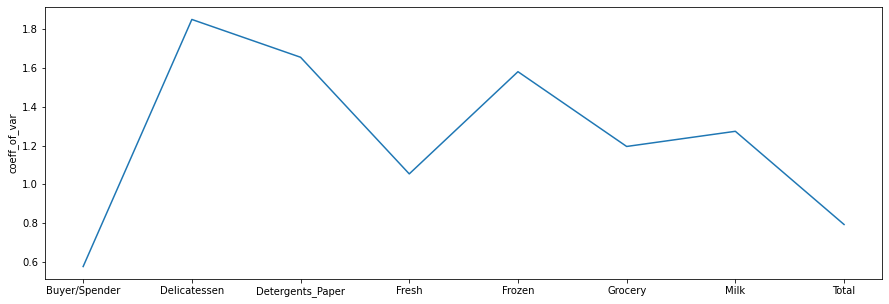

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(df_var.index,df_var['coeff_of_var'],markers=True)
plt.show()

### Fresh itmes shows the least inconsistent behavior where Delicatessen shows the most.


-----------------------------------------------------------------------------------------------------------------------

## 1.4 Are there any outliers in the data?

> let us plot boxplot to find out 

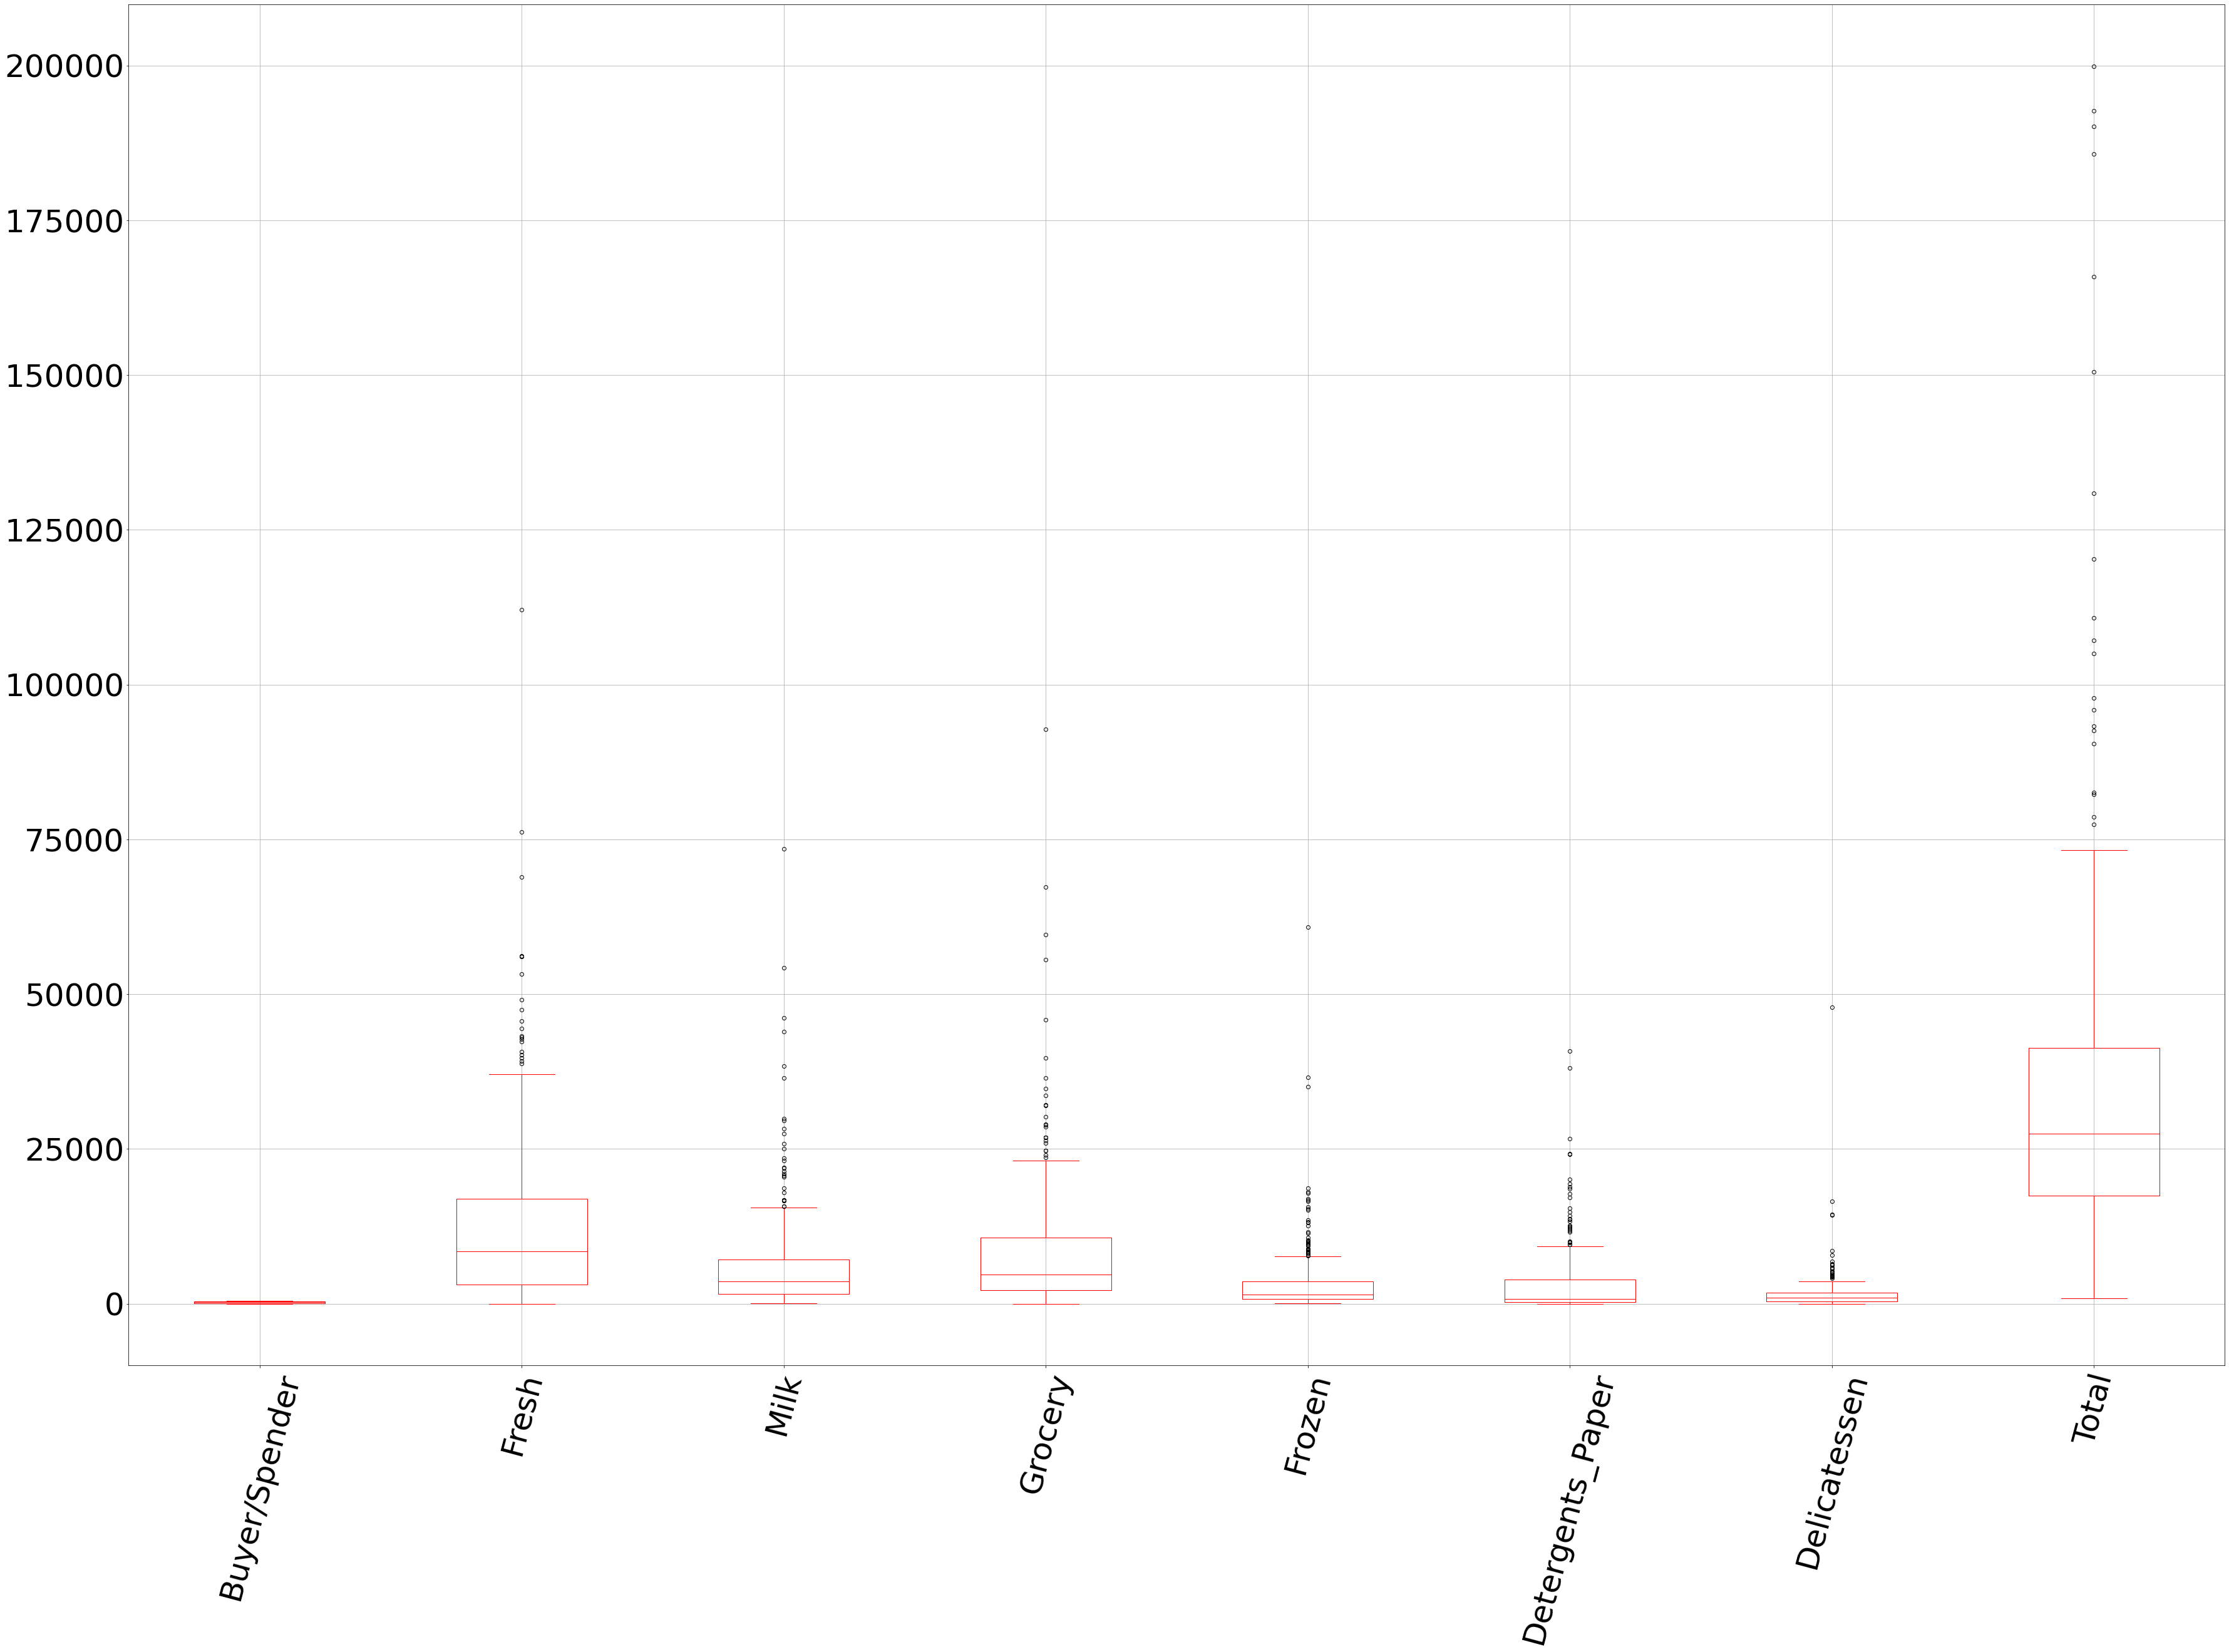

 
All the variables have outliers
Let us plot one by one to get more visibility


In [17]:
plt.figure(figsize=(60,40))
Data.boxplot(rot=75,color='red')
plt.xticks(fontsize=50,color='black')
plt.yticks(fontsize=50,color='black')
plt.show()
print(" ")

print('All the variables have outliers'"\n" 'Let us plot one by one to get more visibility')




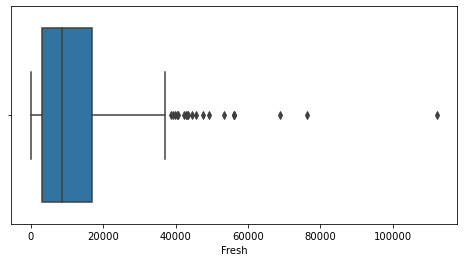

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(Data['Fresh'])
plt.show()

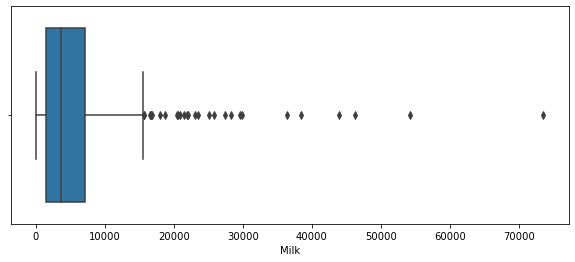

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Milk'])
plt.show()

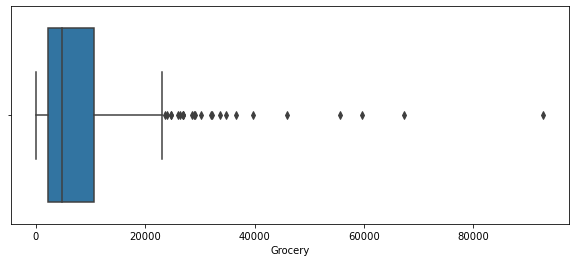

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Grocery'])
plt.show()

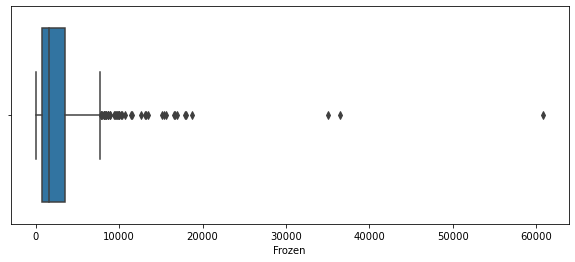

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Frozen'])
plt.show()

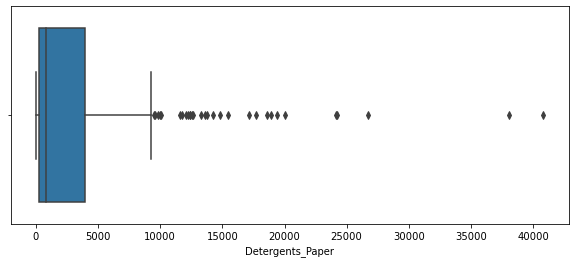

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Detergents_Paper'])
plt.show()

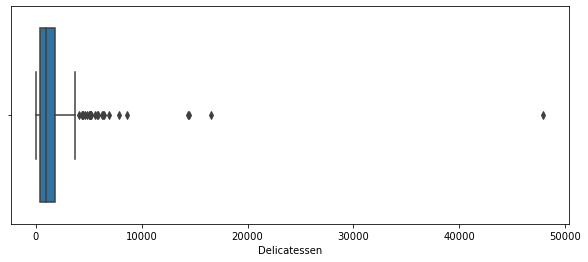

In [23]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Delicatessen'])
plt.show()

### Conclusion
> All the variables have outliers and can be seen in plots

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

•	Average spending in other region is 33789 which is highest among all other region

•	Number of buyers in other region are more i.e., 316 which 72% of total buyers, pricing can be made
    competitive in other regions to distribute this % share of buyers.
    .
•	Channel Hotel covers 55 % of market share and Retail has 45 % so there is not much delta.

•	Fresh alone has market share of 36 % compares to other items and second popular is grocery with 24% market share.
•	We have already seen average  spending per item where fresh is leading and this is also
    the reason fresh has the maximum spending(revenue).
    
•	More stores needs to open in other 2 regions with more discounts to gain more customer traction % share of buyers
    will be increased.
    
•	Fresh has market share of 36 % and this is our top selling item so each of the sub item of fresh needs to be in         stock with competitive pricing.

•	Banners can be run on social media offering deals in festival seasons.

•	Bundling of items can increase the sale of other items like grocery which has a lot of potential,
    We can run an offer for e.g.  with every 20kgs of flour.
    
•	Attractive deals like buying 3 items of grocery you will get 25% or 50% depends  the margin on other.

•	items like 'Milk’, ‘Detergent' or whatever it could be ,this will increase the sale of our least selling items.

•	Centre or critical point  of business will always be our customers and extra discount can be given
    to our regular buyers to keep their trust always.
    
•	We have the data of first time , 2nd time buyers and so on, traffic can be increased by sending them
    messages or email regarding the new sub item launch discounts and limited time period deal


--------------------------------------------------------------------------------------------------------------------


# Problem 2



---------------------------------------------------------------------------------------------------------------

### Let us see the number of variables present , creating a DataFrame as survey

In [24]:
survey=pd.read_csv('Survey-1.csv')
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


### 2.1. For this data, constructing the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [25]:
Major=pd.crosstab(survey['Gender'],survey['Major'],margins=True,margins_name='Total')
Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [26]:
Grad=pd.crosstab(survey['Gender'],survey['Grad Intention'],margins=True,margins_name='Total')
Grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### 2.1.3. Gender and Employment

In [27]:
Employment=pd.crosstab(survey['Gender'],survey['Employment'],margins=True,margins_name='Total')
Employment

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


### 2.1.4. Gender and Computer

In [28]:
Computer=pd.crosstab(survey['Gender'],survey['Computer'],margins=True,margins_name='Total')
Computer

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


### 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [29]:
Total=survey['Gender'].value_counts().sum()
print('Total no. of students are : ',Total)
Male=survey['Gender'].value_counts()['Male']
print('Probability that a randomly selected CMSU student will be male : ',round((Male/Total),2))

Total no. of students are :  62
Probability that a randomly selected CMSU student will be male :  0.47


### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [30]:
Female=survey['Gender'].value_counts()['Female']
print('Probability that a randomly selected CMSU student will be male : ',round((Female/Total),2))

Probability that a randomly selected CMSU student will be male :  0.53


### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

> We will refer the gender and major table which we have already created

In [31]:
print('P(Accounting/Male) is ' ,round((4/29),2))
print('P(CIS/Male) is ' ,round((1/29),2))
print('P(Eco,finance/Male) is ' ,round((4/29),2))
print('P(International business/Male) is ' ,round((2/29),2))
print('P(Management/Male) is ' ,round((6/29),2))
print('P(Other/Male) is ' ,round((4/29),2))
print('P(Retail,Marketing/Male) is ' ,round((5/29),2))
print('P(undecided/Male) is ' ,round((3/29),2))



P(Accounting/Male) is  0.14
P(CIS/Male) is  0.03
P(Eco,finance/Male) is  0.14
P(International business/Male) is  0.07
P(Management/Male) is  0.21
P(Other/Male) is  0.14
P(Retail,Marketing/Male) is  0.17
P(undecided/Male) is  0.1


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [32]:
print('P(Accounting/Female) is ' ,round((3/33),2))
print('P(CIS/Female) is ' ,round((3/33),2))
print('P(Eco,finance/Female) is ' ,round((7/33),2))
print('P(International business/Female) is ' ,round((4/33),2))
print('P(Management/Female) is ' ,round((4/33),2))
print('P(Other/Female) is ' ,round((3/33),2))
print('P(Retail,Marketing/Female) is ' ,round((9/33),2))
print('P(undecided/Female) is ' ,round((0/33),2))


P(Accounting/Female) is  0.09
P(CIS/Female) is  0.09
P(Eco,finance/Female) is  0.21
P(International business/Female) is  0.12
P(Management/Female) is  0.12
P(Other/Female) is  0.09
P(Retail,Marketing/Female) is  0.27
P(undecided/Female) is  0.0


### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [33]:
print('The probability That a randomly chosen student is a male and intends to graduate is',(round(17/62,2)))

The probability That a randomly chosen student is a male and intends to graduate is 0.27


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [34]:
print('The probability that a randomly selected student is a female and does NOT have a laptop is',(round(4/62,4)))


The probability that a randomly selected student is a female and does NOT have a laptop is 0.0645


### 2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment

In [35]:
print('The probability that a randomly chosen student is either a male or'+
     ' has a full-time employment is',(round((29/62+10/62)-7/62,4)))


The probability that a randomly chosen student is either a male or has a full-time employment is 0.5161


### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [36]:
print('The probability that a randomly chosen student is either a male or has '+
      'a full-time employment : %s' %(round(8/33,2)))

The probability that a randomly chosen student is either a male or has a full-time employment : 0.24


### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

> Need to prove P(A INT B) =P(A).P(B)

In [37]:
New_Grad=Grad
del New_Grad['Undecided']
New_Grad

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,33
Male,3,17,29
Total,12,28,62


>P(F int Yes)=11/40

>P(F)=20/40

>P(Yes)=28/40

>P(F int Yes) != P(F).P(Yes)

### So graduate intention and being female are NOT independent events


---------------------------------------------------------------------------------------------------------------

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [38]:
gpa = survey[survey['GPA']<3]['GPA'].count()
print('Number of students having GPA less that 3 is',gpa)
print('If a student is chosen randomly, the probability that his/her GPA is less than 3 is',round(gpa/62,2))

Number of students having GPA less that 3 is 17
If a student is chosen randomly, the probability that his/her GPA is less than 3 is 0.27


### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [39]:
male_sal=survey[(survey['Gender']=='Male') & (survey['Salary']>=50)]['Gender'].count()
female_sal=survey[(survey['Gender']=='Female') & (survey['Salary']>=50)]['Gender'].count()

print('Probability that a randomly selected Male earns 50 or more : ',round(male_sal/29,2))
print('Probability that a randomly selected Female earns 50 or more : ',round(female_sal/33,2))

Probability that a randomly selected Male earns 50 or more :  0.48
Probability that a randomly selected Female earns 50 or more :  0.55


### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

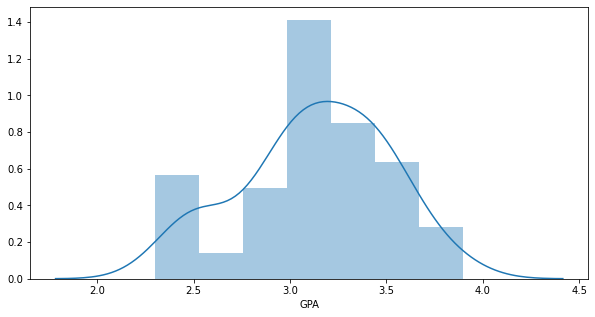

In [40]:
plt.figure(figsize=(10, 5))
sns.distplot(survey['GPA'])
plt.show()


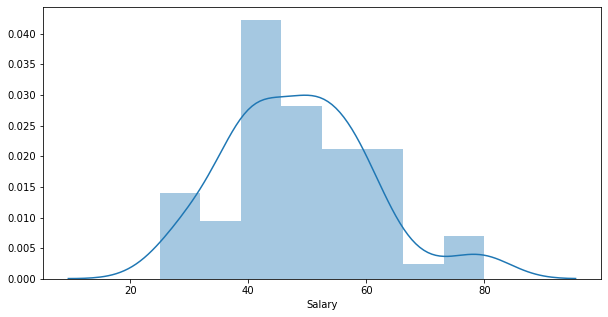

In [41]:
plt.figure(figsize=(10, 5))
sns.distplot(survey['Salary'])
plt.show()


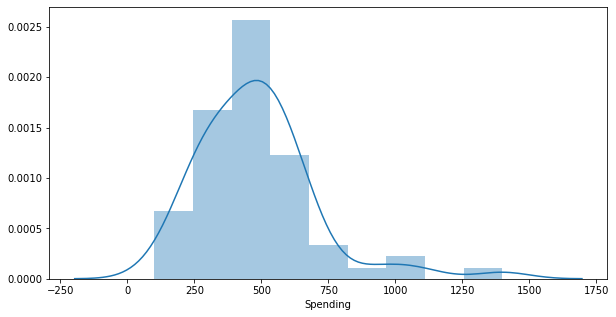

In [42]:
plt.figure(figsize=(10, 5))
sns.distplot(survey['Spending'])
plt.show()


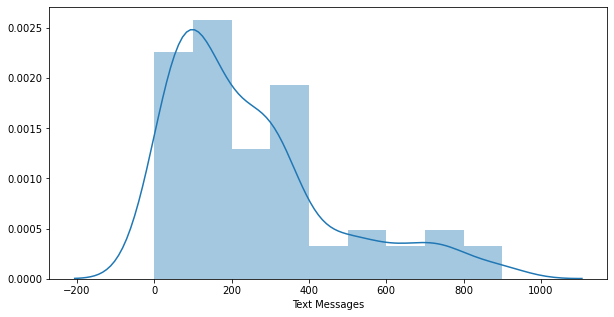

In [43]:
plt.figure(figsize=(10, 5))
sns.distplot(survey['Text Messages'])
plt.show()


### There are outliers in all four continous variables GPA and Salary are closed to or approximately  normally dsitributed but not satisfactory, GPA and Salary are both  left skewed.

### If number of sample increases in Spending then it will fall under noraml distribution

### Text message is right skewed and hence it is not normally distributed


---------------------------------------------------------------------------------------------------------------

### 2.8.2 Write a note summarizing your conclusions.

•	From the data 47 % of students are male and 53 % are female.

•	About 27 % of males intends to graduate.

•	About 4 % of females does not have laptop.

•	About 51 % student are either male or they are having full-time employment.

•	About 24 % of student who are women majoring international business and management.

•	Having graduate intention and being female are independent events

•	About 27% of students have less than 3 GPA.

•	About 22 % of men are having salary more than 50 where women have 29%

•	There are 4 continuous variable (Float type) and among them only GPA is nearest to match normally 
    distributed curve and rest are approx. and need to clean the data as there are  outliers present in rest of     the variables



---------------------------------------------------------------------------------------------------------------


# Problem 3


>An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

In [44]:
asphalt=pd.read_csv('A+&+B+shingles.csv')
asphalt.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


### 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

>For A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

H0: u<=0.35

HA:u>0.35

--------------------------------------------------------------------------------------------------------------
>For B shingles, the null and alternative hypothesis to test whether the population
 mean moisture content is less than 0.35 pound per 100 square feet is given:

H0: u<=0.35

HA: u>0.35

---------------------------------------------------------------------------------------------------------------
$\alpha$=0.05

In [45]:
t_stat,p=ttest_1samp(asphalt['A'], 0.35)
p=p/2
print('t_stat and p_val for A Shingles are',(round(t_stat,2),round(p,3)))

t_stat and p_val for A Shingles are (-1.47, 0.075)


### P_Value is >0.05 so at 95% confidence level we failed to reject the null hypothesis and for A shingles mean moisture content is less than or eqaul to 0.35

In [46]:
t_stat_1,p_1=ttest_1samp(asphalt['B'], 0.35,nan_policy='omit')
p_1=p_1/2
print('t_stat and p_val for B Shingles are',(round(t_stat_1,2),round(p_1,3)))

t_stat and p_val for B Shingles are (-3.1, 0.002)


### P_Value is < 0.05,so at 95% confidence level null hypothesis which implies the mean moisture content present in B shingles is more than 0.35


---------------------------------------------------------------------------------------------------------------

### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?


$\alpha$=0.05

>Both the samples are independent and we will conduct 2 sample ttest

>It's a two tailed ttest and hence error will be added of both the sides

>Null Hypothesis is  population means for shingles A and B are equal

H0: uA=uB

>Alternative Hypothesis is the population means for shingles A and B are not equal 

HA: uA!=uB

In [47]:
t_stat, p_value  = ttest_ind(asphalt['A'],asphalt['B'],nan_policy='omit')
print('T_Stat is',t_stat) 
print('P_Value is',p_value)   

T_Stat is 1.2896282719661123
P_Value is 0.2017496571835306


### P_value is > 0.05 and so at 95% confidence level we failed to reject the null hypothesis which implies the population means of shingles A and B are equal